# Machine Learning Engineer Nanodegree
## Introduction and Foundations
## Project: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive.

# Getting Started
To begin working with the RMS Titanic passenger data, we'll first need to `import` the functionality we need, and load our data into a `pandas` DataFrame.

In [1]:
import numpy as np
import pandas as pd

# RMS Titanic data visualization code 
from titanic_visualizations import survival_stats
from IPython.display import display
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:
- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain `NaN`)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin** Cabin number of the passenger (Some entries contain `NaN`)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variable `outcomes`. We will use these outcomes as our prediction targets.

In [2]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that `data` (the passenger data) and `outcomes` (the outcomes of survival) are now *paired*. That means for any passenger `data.loc[i]`, they have the survival outcome `outcome[i]`.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how *accurate* our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct.

In [3]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


# Making Predictions

If we were told to make a prediction about any passenger aboard the RMS Titanic who we did not know anything about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers as a whole did not survive the ship sinking.
The function below will always predict that a passenger did not survive.

In [4]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

### Question 1
*Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?*

In [5]:
print accuracy_score(outcomes, predictions)
print (outcomes == 0).sum()  # count of passengers who did not survive
print outcomes.count()       # count of all passengers in table

Predictions have an accuracy of 61.62%.
549
891


**Answer:** Using the naive prediction that every passenger will not survive, the accuracy obtained is **61.62%**. This indicates that 61.62% of passengers did not survive, as confirmed by the calculations above.

Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using the `survival_stats` function. This function is defined in the `titanic_visualizations.py` Python script included with this project. The first two parameters passed to the function are the RMS Titanic data and passenger survival outcomes, respectively. The third parameter indicates which feature we want to plot survival statistics across.

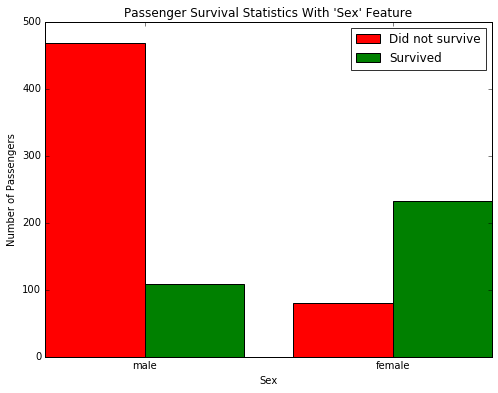

In [6]:
survival_stats(data, outcomes, 'Sex')

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females *did* survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.

In [7]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if(passenger['Sex'] == 'male'):
            predictions.append(0)
        else:
            predictions.append(1)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

### Question 2
*How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?*

In [8]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


**Answer**: The new accuracy with the modified prediction algorithm is **78.68**. This indicates that by guessing based solely on gender will predict the right outcome 78.68% of the time. This is a 27.7% improvement in accuracy over our previous rudimentary prediction algorithm!

Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. Consider, for example, all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the `survival_stats` function. This time, we'll use a fourth parameter to filter out the data so that only passengers with the **Sex** 'male' will be included.

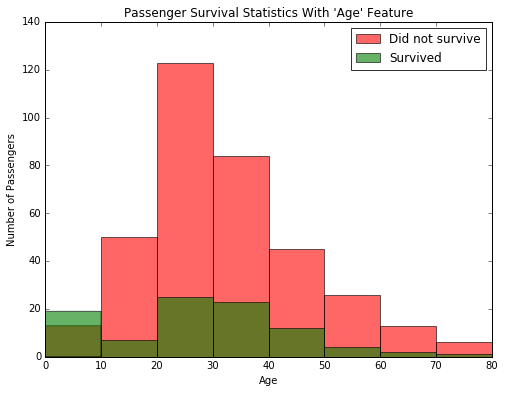

In [9]:
survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examining the survival statistics, the majority of males younger then 10 survived the ship sinking, whereas most males age 10 or older *did not survive* the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.

In [10]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        
        # if passenger is a female OR male aged younger than 10
        if(passenger['Sex'] == 'female' or (passenger['Sex'] == 'male' and passenger['Age'] < 10)):
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

### Question 3
*How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?*

In [11]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


**Answer**: With the third iteration of our algorithm, the prediction accuracy reached **79.35%**, which is a 0.85% increase from our previous model.

Adding the feature **Age** as a condition in conjunction with **Sex** improves the accuracy by a small margin more than with simply using the feature **Sex** alone. Now we will find a series of features and conditions to split the data on to obtain an outcome prediction accuracy of at least 80%.

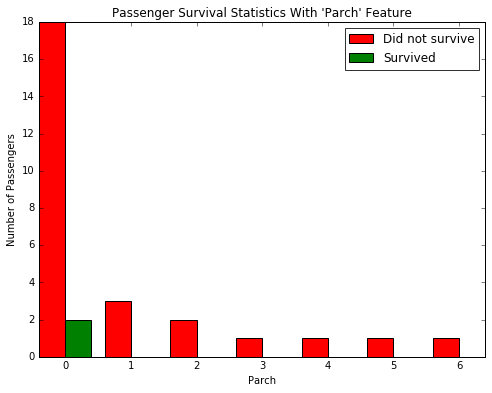

In [12]:
survival_stats(data, outcomes, 'Parch', ["Pclass == 3", "Age > 40", "Age < 50"])

In [13]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        is_third_class_male = passenger['Pclass'] == 3 and passenger['Sex'] == 'male'
        is_female = passenger['Sex'] == 'female'
        is_young_male = passenger['Sex'] == 'male' and passenger['Age'] < 10
        is_middle_age_poor_no_family = passenger['Parch'] == 0 and passenger['Pclass'] == 3 and passenger['Age'] > 40 and passenger ['Age'] < 50
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if(not is_third_class_male and (is_female or is_young_male) and not is_middle_age_poor_no_family):
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

### Question 4
*Describe the steps taken to implement the final prediction model so that it got an accuracy of at least 80%.*

In [14]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 80.13%.


**Answer**: To implement the final prediction model so that it had an accuracy of 80.13%, I first looked at the relationship between survival rate and passenger class. As expected, poorer passengers were more likely to not survive than upper-class passengers. However, I investigated further and realized that this was only really true for males, and that females did not seem to be affected by class. This led me to add ``is_third_class_male`` as a parameter to the algorithm, which improved the accuracy to 79.91%. The next step I made was to look at siblings. I found that those in the third class with no siblings were more likely to perish than those with siblings. I added this to the algorithm, but this actually *decreased* my accuracy. Lastly, I looked at a very specific criterion, which included number of parents/children, age, and passenger class. Initially, I did not consider age, and found that passengers without parents/children onboard and in the third class faced higher risk of death. I then looked at age as a parameter, and realized the likelihood of death increased for middle-aged men, around 40 - 50 years old. This led me to my final parameter, ``is_middle_age_poor_no_family``, which increased the accuracy to **80.13%**.

# Conclusion

We now have an algorithm for predicting whether or not a person survived the Titanic disaster, based on their features. This has been a manual implementation of a simple machine learning model, the _decision tree_. In a decision tree, we split the data into smaller groups, one feature at a time. Each of these splits will result in groups that are more homogeneous than the original group, so that our predictions become more accurate. The advantage of having a computer do things for us is that it will be more exhaustive and more precise than our manual exploration above. [This link](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) provides another introduction into machine learning using a decision tree.

A decision tree is just one of many algorithms that fall into the category of _supervised learning_. In supervised learning, we concern ourselves with using features of data to predict or model things with objective outcome labels. That is, each of our datapoints has a true outcome value, whether that be a category label like survival in the Titanic dataset, or a continuous value like predicting the price of a house.

### Question 5
*What are other examples of where supervised learning can be applied?*

**Answer**: Supervised learning can be used to predict a number of devastating events in an effort to prevent them from happening, like the Titanic example. Another example is that of a stock market crash, or economic depression. A variety of parameters can be analyzed, such as GDP, interest rates, consumer satisfaction, inflation rates, and so on. These may or may not explain the impending crash, and machine learning (more specifically supervised learning) can be used to accurately predict the event well before it happens.